# Compute gcorr diseases and phenotypes (ldscr)
###### Created 03/08/2022
###### Last modification 17/08/2022

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob, os
from os import listdir
from os.path import isfile, join

In [358]:
diseases_traits = {
'4079':'DBP ',
'4080':'SBP',
#'102':'PR',
#'1558':'Alcohol intake freq',
#'21021':'Pulse wave arterial stiffness',
'40000':'Date death',
'42020':'Date AD',
'30760':'HDL cholesterol',
'30780':'LDL direct',
'30870':'Triglycerides',
'2976':'Age diabetes',
'3627':'Age angina',
'3894':'Age heart attack',
#'4012':'Age DVT',
#'4056':'Age stroke',
#'40007':'Age death',
'4689':'Age glaucoma',
'4700':'Age cataract',
'5408':'Amblyopia',
#'5610':'Presbyopia',
#'5832':'Hypermetropia',
#'5843':'Myopia',
#'5855':'Astigmatism',
'5890':'Diabetes eye',
'5945':'Eye other',
#'1717':'Skin colour',
#'1747':'Hair colour',
'4022':'Age pulmonary embolism',
'131380':'Circulatory sys dis',
'131390':'Other art dis'}

traits_all = list(diseases_traits.keys())
traits_names_alls = list(diseases_traits.values())

In [347]:
# path This we can read from config
def try_to_compute_all():
    path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/2022_08_03_ventile5/main_phenos/gcorr_diseases/' #'/HDD/data/ukbb/disease_sumstats/files_modified/'
    save_path = path

    l_diseases_all=[]
    for trait in traits_all:
        for file in os.listdir(path):
            if file.startswith(trait):
                if file.endswith('.tsv'):
                    #print('PHENO', trait)
                    #print(file, '\n')
                    df_ss = pd.read_csv(path + file,  nrows=1, sep='\t')
                    #print(df_ss['N'])
                    data={
                        'pheno':  trait,
                        'file':  file+'.sumstats.gz',
                        'N': df_ss['N'].iloc[0],
                        }
                    l_diseases_all.append(data)

    df_diseases_all =pd.DataFrame(l_diseases_all)
    #file_name_end = '_irnt.gwas.imputed_v3.both_sexes.tsv'
    
    ## traits_phenos This we can read from config
    traits_phenos = ["tau1_artery" , "tau1_vein" , "D_A_std" , "D_V_std" ,
                    "bifurcations" , "VD_orig_artery" , "VD_orig_vein" , "ratio_VD" , 
                    "mean_angle_taa" , "mean_angle_tva" , "eq_CRAE" , "eq_CRVE" , 
                     "ratio_CRAE_CRVE", "medianDiameter_artery" , "medianDiameter_vein" , "ratio_AV_medianDiameter", "ratio_AV_DF"]

    l_traits_file=[]
    for trait in traits_phenos:
        file_pheno= trait + '__munged.sumstats.gz'
        l_traits_file.append(file_pheno)

    type_sex='both_sexes'

    traits_files = l_traits_file + list(df_diseases_all['file'])
    traits_names = traits_phenos + list(df_diseases_all['pheno'])
    print(len(traits_files), len(l_traits_file), len(list(df_diseases_all['file'])))

In [367]:
reduced_diseases_traits = {
'4079':'DBP ',
'4080':'SBP',    
'2976':'Age diabetes',
'3627':'Age angina',
'3894':'Age heart attack',
#'4689':'Age glaucoma',
'4700':'Age cataract'}

traits_reduced = list(reduced_diseases_traits.keys())


traits_phenos = ["tau1_artery" , "tau1_vein" , "D_A_std" , "D_V_std" ,
                    "bifurcations" , "VD_orig_artery" , "VD_orig_vein" , "ratio_VD" , 
                    "mean_angle_taa" , "mean_angle_tva" , "eq_CRAE" , "eq_CRVE" , 
                     "ratio_CRAE_CRVE", "medianDiameter_artery" , "medianDiameter_vein" , "ratio_AV_medianDiameter", "ratio_AV_DF"]


datafields_irnt = [ dat + "_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz" for dat in traits_reduced]
datafields_pheno = [ dat + "__munged.sumstats.gz" for dat in traits_phenos]

traits_names = datafields_pheno + datafields_irnt

In [368]:
### IMPORTANT: If you have not same file go back to diseases_traits and comment 
### the phenotypes that are missing

In [369]:
# filter the files names containing 2 traits
def read_ldsr(traits_files):
    df_cov=pd.DataFrame(columns =traits_files, index=traits_files)
    df_corr=pd.DataFrame(columns =traits_files, index=traits_files)
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_4700_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz.log
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_D_A_std__munged.sumstats.gz.log

    for i  in range(len(traits_files)):
        for j in range(len(traits_files)):
            h2 = []
            file_both_name = traits_files[i]+'_'+ traits_files[j]+'.log'
            dir_traitsfile = path+file_both_name
            #print(dir_traitsfile)
            with open(dir_traitsfile) as fp:
                #print(fp)
                #print(traits_files[i],traits_files[j])
                Lines = fp.readlines()
                for line in Lines:
                    #print(line)
                    split = line.split()
                    if('gencov:' in split):
                        df_cov.iloc[i][j] = float(split[ split.index('gencov:') +1 ])
                        df_cov.iloc[j][i] = float(split[ split.index('gencov:') +1 ])
                        #print(split)
                    if('Correlation:' in split):
                        #print(line)
                        #print(split)
                        df_corr.iloc[i][j] = float(split[ split.index('Correlation:') +1 ]) 
                        df_corr.iloc[j][i] = float(split[ split.index('Correlation:') +1 ])
                        #print(array2)
                        #print(split )
                        #print( df_corr.iloc[i][j], float(split[ split.index('Correlation:') +1 ]) )
                        #print( df_corr.iloc[j][i], float(split[ split.index('Correlation:') +1 ]))
    return df_cov, df_corr

df_cov, df_corr = read_ldsr(traits_names)        

In [370]:
df_corr = df_corr.astype(float)
df_reducida = df_corr
df_reducida df.drop(index='cow', columns='small') 
df.drop(index=('falcon', 'weight'))

,tau1_artery__munged.sumstats.gz,tau1_vein__munged.sumstats.gz,D_A_std__munged.sumstats.gz,D_V_std__munged.sumstats.gz,bifurcations__munged.sumstats.gz,VD_orig_artery__munged.sumstats.gz,VD_orig_vein__munged.sumstats.gz,ratio_VD__munged.sumstats.gz,mean_angle_taa__munged.sumstats.gz,mean_angle_tva__munged.sumstats.gz,...,medianDiameter_artery__munged.sumstats.gz,medianDiameter_vein__munged.sumstats.gz,ratio_AV_medianDiameter__munged.sumstats.gz,ratio_AV_DF__munged.sumstats.gz,4079_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,4080_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,3627_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,3894_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,4700_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz
tau1_artery__munged.sumstats.gz,1.0000,0.4987,0.1038,0.0227,0.0343,0.1300,0.0762,0.0903,0.1664,0.1346,...,0.1627,0.0051,0.1198,0.8172,-0.0057,-0.0251,0.6778,-0.0978,0.0399,0.0166
tau1_vein__munged.sumstats.gz,0.4987,1.0000,-0.1154,-0.2009,0.2541,0.2928,0.2915,0.0641,0.1431,0.1538,...,-0.0405,-0.2854,0.2437,-0.0902,-0.1813,-0.1365,0.4090,0.0399,-0.3535,0.1290
D_A_std__munged.sumstats.gz,0.1038,-0.1154,1.0000,0.6239,-0.1590,-0.0029,-0.1644,0.1399,0.2218,0.1820,...,0.6489,0.6273,-0.0647,0.1774,0.2475,0.1122,0.7187,0.0870,0.1520,0.0994
D_V_std__munged.sumstats.gz,0.0227,-0.2009,0.6239,1.0000,-0.1588,-0.0628,-0.0214,-0.0883,0.1964,0.3378,...,0.3210,0.5025,-0.2109,0.1411,0.0716,-0.0369,0.4115,-0.0651,-0.2221,0.2013
bifurcations__munged.sumstats.gz,0.0343,0.2541,-0.1590,-0.1588,1.0000,0.8892,0.9350,0.1344,0.0854,0.0276,...,-0.0918,-0.6664,0.5385,-0.1173,0.2600,0.3754,0.2846,-0.1783,-0.7069,-0.3737
VD_orig_artery__munged.sumstats.gz,0.1300,0.2928,-0.0029,-0.0628,0.8892,1.0000,0.7941,0.5069,0.1309,0.0351,...,0.2513,-0.4938,0.6710,-0.0465,0.2095,0.3631,0.3770,0.0314,-0.5066,-0.1232
VD_orig_vein__munged.sumstats.gz,0.0762,0.2915,-0.1644,-0.0214,0.9350,0.7941,1.0000,-0.1177,0.0837,0.0440,...,-0.1308,-0.5882,0.4333,-0.0976,0.0412,0.3157,0.2098,-0.1365,-0.4047,-0.2557
ratio_VD__munged.sumstats.gz,0.0903,0.0641,0.1399,-0.0883,0.1344,0.5069,-0.1177,1.0000,0.0733,-0.0295,...,0.5233,-0.0421,0.4866,0.0501,0.2195,0.1813,0.3760,0.1175,-0.4310,0.1461
mean_angle_taa__munged.sumstats.gz,0.1664,0.1431,0.2218,0.1964,0.0854,0.1309,0.0837,0.0733,1.0000,0.6474,...,0.0418,0.1375,-0.1099,0.0939,0.0372,0.1604,0.7349,-0.1588,-0.1355,0.0244
mean_angle_tva__munged.sumstats.gz,0.1346,0.1538,0.1820,0.3378,0.0276,0.0351,0.0440,-0.0295,0.6474,1.0000,...,0.1344,0.0215,0.0781,0.0437,0.3928,0.2453,-0.2726,-0.1206,0.5939,0.6705


In [371]:
### replace nan by 0
df_corr= df_corr.replace(np.nan, 0)
df_corr

,tau1_artery__munged.sumstats.gz,tau1_vein__munged.sumstats.gz,D_A_std__munged.sumstats.gz,D_V_std__munged.sumstats.gz,bifurcations__munged.sumstats.gz,VD_orig_artery__munged.sumstats.gz,VD_orig_vein__munged.sumstats.gz,ratio_VD__munged.sumstats.gz,mean_angle_taa__munged.sumstats.gz,mean_angle_tva__munged.sumstats.gz,...,medianDiameter_artery__munged.sumstats.gz,medianDiameter_vein__munged.sumstats.gz,ratio_AV_medianDiameter__munged.sumstats.gz,ratio_AV_DF__munged.sumstats.gz,4079_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,4080_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,3627_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,3894_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,4700_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz
tau1_artery__munged.sumstats.gz,1.0000,0.4987,0.1038,0.0227,0.0343,0.1300,0.0762,0.0903,0.1664,0.1346,...,0.1627,0.0051,0.1198,0.8172,-0.0057,-0.0251,0.6778,-0.0978,0.0399,0.0166
tau1_vein__munged.sumstats.gz,0.4987,1.0000,-0.1154,-0.2009,0.2541,0.2928,0.2915,0.0641,0.1431,0.1538,...,-0.0405,-0.2854,0.2437,-0.0902,-0.1813,-0.1365,0.4090,0.0399,-0.3535,0.1290
D_A_std__munged.sumstats.gz,0.1038,-0.1154,1.0000,0.6239,-0.1590,-0.0029,-0.1644,0.1399,0.2218,0.1820,...,0.6489,0.6273,-0.0647,0.1774,0.2475,0.1122,0.7187,0.0870,0.1520,0.0994
D_V_std__munged.sumstats.gz,0.0227,-0.2009,0.6239,1.0000,-0.1588,-0.0628,-0.0214,-0.0883,0.1964,0.3378,...,0.3210,0.5025,-0.2109,0.1411,0.0716,-0.0369,0.4115,-0.0651,-0.2221,0.2013
bifurcations__munged.sumstats.gz,0.0343,0.2541,-0.1590,-0.1588,1.0000,0.8892,0.9350,0.1344,0.0854,0.0276,...,-0.0918,-0.6664,0.5385,-0.1173,0.2600,0.3754,0.2846,-0.1783,-0.7069,-0.3737
VD_orig_artery__munged.sumstats.gz,0.1300,0.2928,-0.0029,-0.0628,0.8892,1.0000,0.7941,0.5069,0.1309,0.0351,...,0.2513,-0.4938,0.6710,-0.0465,0.2095,0.3631,0.3770,0.0314,-0.5066,-0.1232
VD_orig_vein__munged.sumstats.gz,0.0762,0.2915,-0.1644,-0.0214,0.9350,0.7941,1.0000,-0.1177,0.0837,0.0440,...,-0.1308,-0.5882,0.4333,-0.0976,0.0412,0.3157,0.2098,-0.1365,-0.4047,-0.2557
ratio_VD__munged.sumstats.gz,0.0903,0.0641,0.1399,-0.0883,0.1344,0.5069,-0.1177,1.0000,0.0733,-0.0295,...,0.5233,-0.0421,0.4866,0.0501,0.2195,0.1813,0.3760,0.1175,-0.4310,0.1461
mean_angle_taa__munged.sumstats.gz,0.1664,0.1431,0.2218,0.1964,0.0854,0.1309,0.0837,0.0733,1.0000,0.6474,...,0.0418,0.1375,-0.1099,0.0939,0.0372,0.1604,0.7349,-0.1588,-0.1355,0.0244
mean_angle_tva__munged.sumstats.gz,0.1346,0.1538,0.1820,0.3378,0.0276,0.0351,0.0440,-0.0295,0.6474,1.0000,...,0.1344,0.0215,0.0781,0.0437,0.3928,0.2453,-0.2726,-0.1206,0.5939,0.6705


Text(0.5, 1.0, 'Genetic Correlation')

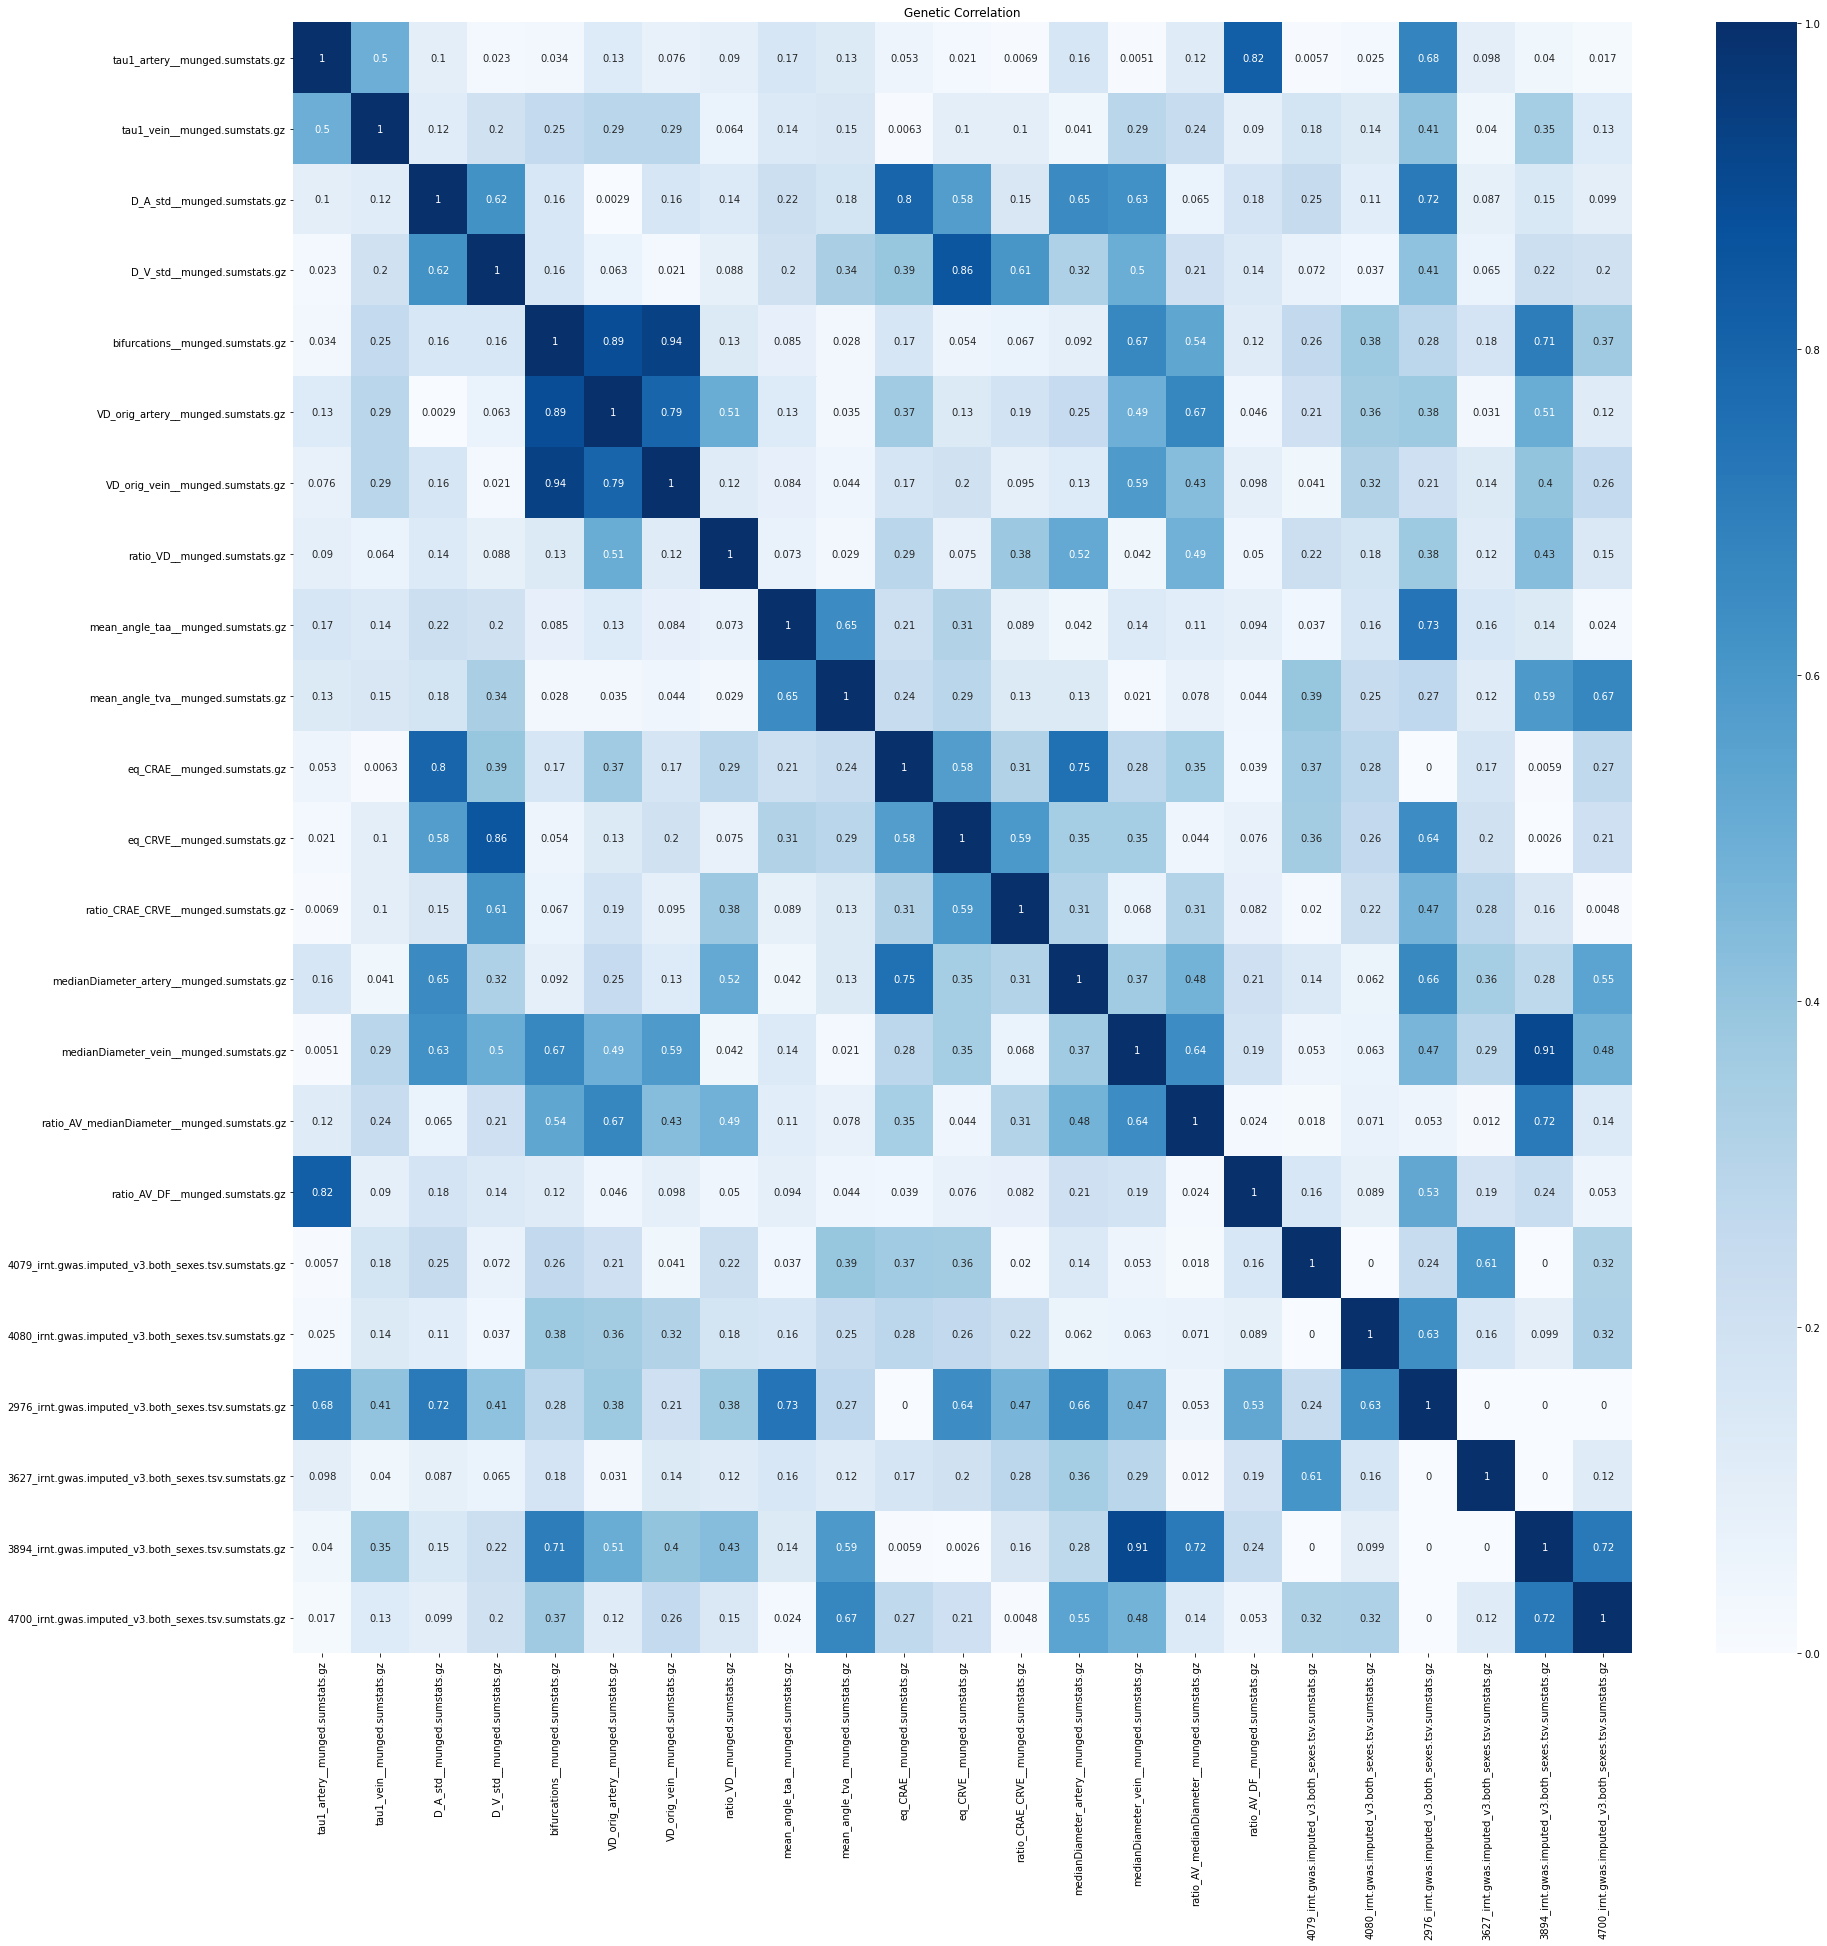

In [373]:
#### gen corr
#df_aux_.rename(diseases_traits, axis=1)
    #columns = {'4079_irnt':'DBP', '4080_irnt':'SBP', '4700_irnt':'cataract','4056_irnt':'stroke', '4012_irnt':'DVT', '40007_irnt':'age_death', '3894_irnt':'heart_attack', '3627_irnt':'angina', '2976_irnt':'diabetes', '21021_irnt':'wave_arterial'}, inplace = True)

plt.figure(figsize=(30,30))
#plt.figure(figsize=(10,10))
sb.heatmap(abs(df_corr),cmap="Blues",annot=True)
#sb.heatmap(df2,vmin=0, vmax=1,cmap="Blues",annot=True)
plt.title('Genetic Correlation')
#plt.savefig(save_path +'diseases_gcorr.jpg')



In [357]:
df_aux_ = df_corr
df_aux_= df_aux_.rename(diseases_traits, axis=1)
df_aux_

,tau1_artery__munged.sumstats.gz,tau1_vein__munged.sumstats.gz,D_A_std__munged.sumstats.gz,D_V_std__munged.sumstats.gz,bifurcations__munged.sumstats.gz,VD_orig_artery__munged.sumstats.gz,VD_orig_vein__munged.sumstats.gz,ratio_VD__munged.sumstats.gz,mean_angle_taa__munged.sumstats.gz,mean_angle_tva__munged.sumstats.gz,...,4080_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,4080_raw.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,2976_raw.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,3627_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,3627_raw.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,3894_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,3894_raw.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,4700_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz,4700_raw.gwas.imputed_v3.both_sexes.tsv.sumstats.gz
tau1_artery__munged.sumstats.gz,1.0000,0.4987,0.1038,0.0227,0.0343,0.1300,0.0762,0.0903,0.1664,0.1346,...,-0.0251,-0.0121,0.4014,0.6778,-0.0978,-0.1023,0.0399,-0.0009,0.0166,0.0884
tau1_vein__munged.sumstats.gz,0.4987,1.0000,-0.1154,-0.2009,0.2541,0.2928,0.2915,0.0641,0.1431,0.1538,...,-0.1365,-0.1633,0.2280,0.4090,0.0399,0.0157,-0.3535,-0.3612,0.1290,0.1586
D_A_std__munged.sumstats.gz,0.1038,-0.1154,1.0000,0.6239,-0.1590,-0.0029,-0.1644,0.1399,0.2218,0.1820,...,0.1122,0.1045,0.5699,0.7187,0.0870,0.1189,0.1520,0.2052,0.0994,0.2258
D_V_std__munged.sumstats.gz,0.0227,-0.2009,0.6239,1.0000,-0.1588,-0.0628,-0.0214,-0.0883,0.1964,0.3378,...,-0.0369,-0.0204,0.1876,0.4115,-0.0651,-0.0658,-0.2221,-0.1944,0.2013,0.3465
bifurcations__munged.sumstats.gz,0.0343,0.2541,-0.1590,-0.1588,1.0000,0.8892,0.9350,0.1344,0.0854,0.0276,...,0.3754,0.3601,0.1148,0.2846,-0.1783,-0.2476,-0.7069,-0.5948,-0.3737,-0.4134
VD_orig_artery__munged.sumstats.gz,0.1300,0.2928,-0.0029,-0.0628,0.8892,1.0000,0.7941,0.5069,0.1309,0.0351,...,0.3631,0.3428,0.2589,0.3770,0.0314,-0.0288,-0.5066,-0.3594,-0.1232,-0.0935
VD_orig_vein__munged.sumstats.gz,0.0762,0.2915,-0.1644,-0.0214,0.9350,0.7941,1.0000,-0.1177,0.0837,0.0440,...,0.3157,0.3110,0.1300,0.2098,-0.1365,-0.1875,-0.4047,-0.3045,-0.2557,-0.3396
ratio_VD__munged.sumstats.gz,0.0903,0.0641,0.1399,-0.0883,0.1344,0.5069,-0.1177,1.0000,0.0733,-0.0295,...,0.1813,0.1607,0.2615,0.3760,0.1175,0.0931,-0.4310,-0.3450,0.1461,0.2756
mean_angle_taa__munged.sumstats.gz,0.1664,0.1431,0.2218,0.1964,0.0854,0.1309,0.0837,0.0733,1.0000,0.6474,...,0.1604,0.1243,0.4428,0.7349,-0.1588,-0.1305,-0.1355,-0.2237,0.0244,-0.2390
mean_angle_tva__munged.sumstats.gz,0.1346,0.1538,0.1820,0.3378,0.0276,0.0351,0.0440,-0.0295,0.6474,1.0000,...,0.2453,0.2345,-0.1246,-0.2726,-0.1206,-0.1345,0.5939,0.5234,0.6705,0.6834


# pairwise distance metric: an easy proxy for "correlation distance": 1 - abs(corr)
# clustering method: average

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


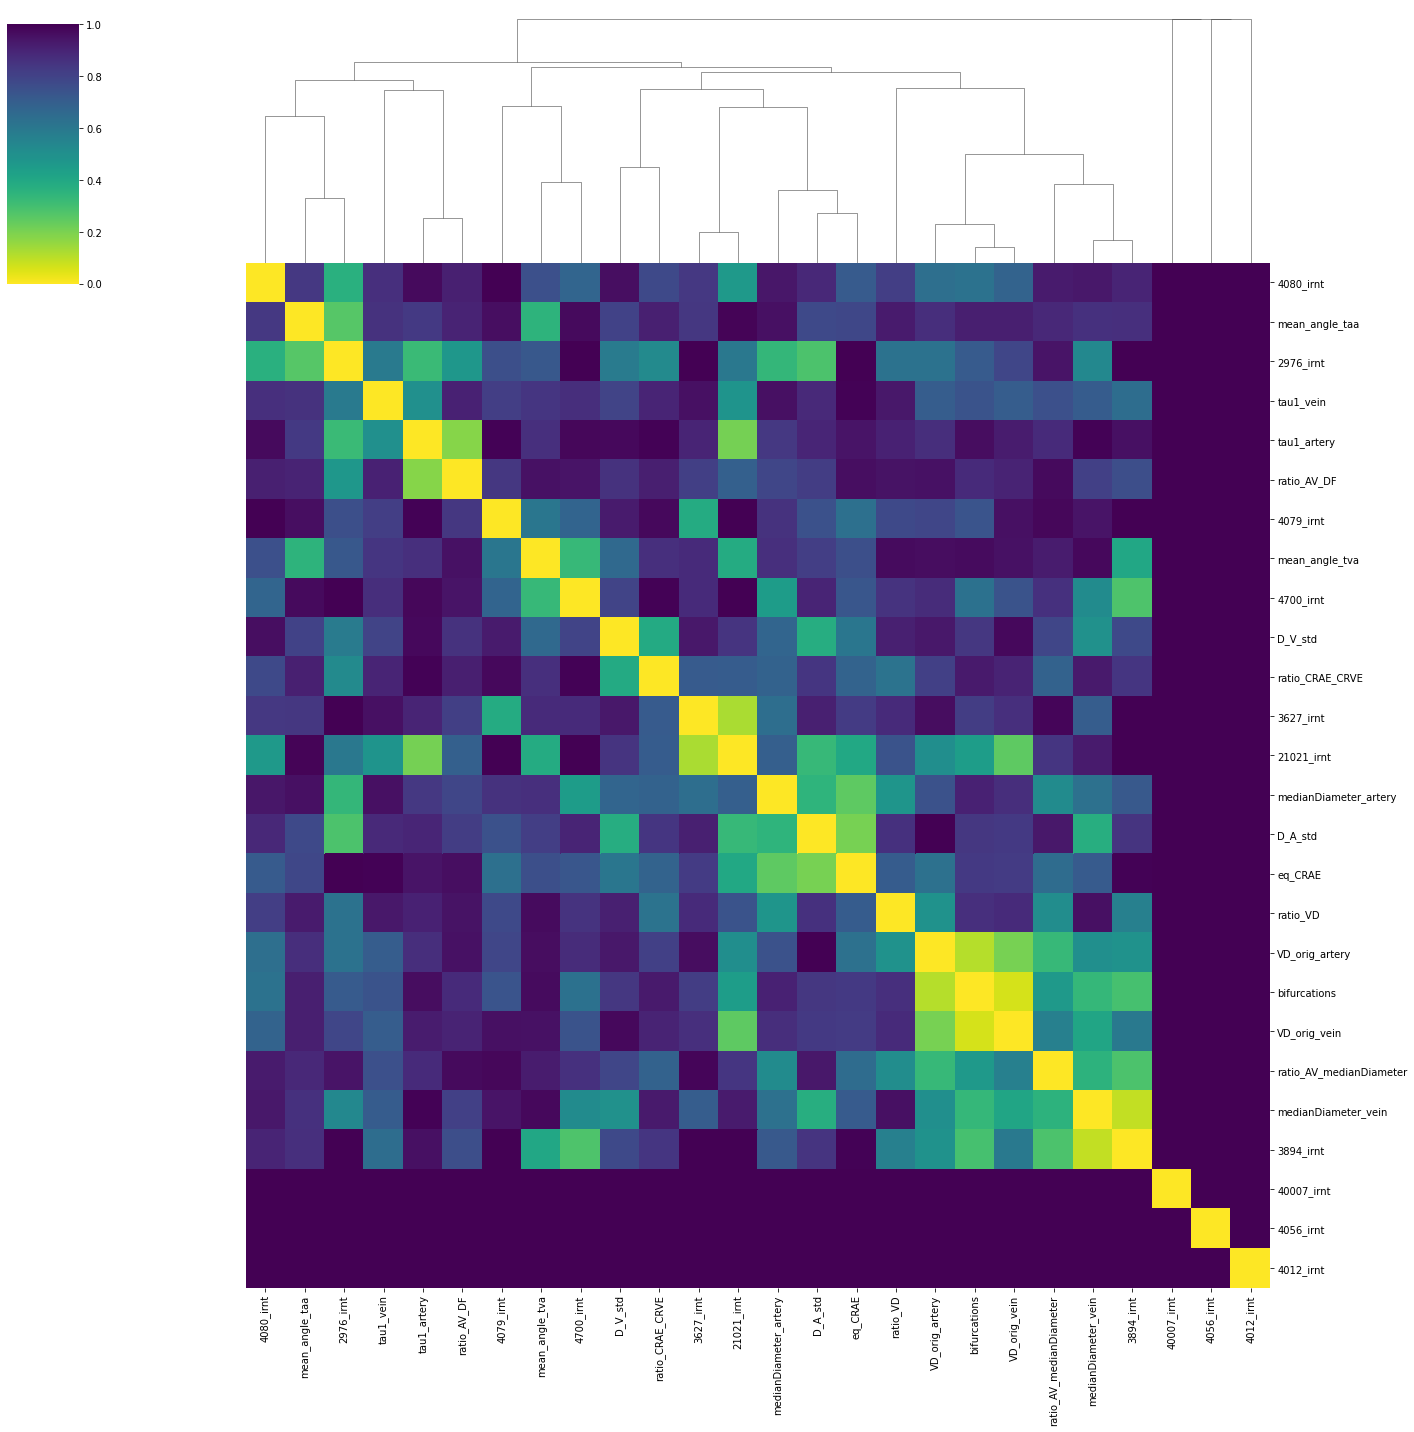

In [89]:
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
### You need to: 
## - delete the nans, 
## - diagonal to 0, and
## - abs(linkage)

df_2_nan = df_corr
df_2_nan=df_2_nan.replace(np.nan,1)
#print('Count nans: ', df2.isna().sum().sum(), df_2_nan.isna().sum().sum())
# pairwise distance: define distance between two perfectly negatively correlated traits as 0
df_otro = 1 - abs(df_2_nan) 
## diagonal same value:
df_otro.values[[np.arange(df_otro.shape[0])]*2] = 0

linkage = hc.linkage(sp.distance.squareform(df_otro), method='average')
lik_abs= abs(linkage)
h = sns.clustermap(df_otro, row_linkage=lik_abs, col_linkage=lik_abs, cmap=cm.get_cmap('viridis_r'), figsize=(20,20), vmin=0, vmax=1)
h.ax_row_dendrogram.set_visible(False)
#h.ax_heatmap.xaxis.tick_top()
h.ax_heatmap.tick_params(axis='x', rotation=90)
#plt.savefig('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/ldsr_correlation/diseases_12_08_2022_gcorrimagen.jpg')